In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import astropy
from astropy.io import fits
from astropy.table import Table
from astropy.cosmology import WMAP9 as cosmo
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.gridspec import GridSpec
import linmix

import mplpresets
import plotfunctions

In [3]:
fullcleardf = pd.read_csv('data/fullcleardf.csv')
sortedclearmergedf = pd.read_csv('data/sortedclearmergedf.csv')
barrodf =  pd.read_csv('data/barrodf.csv')
barromiddf =  pd.read_csv('data/barromiddf.csv')

limitdf = pd.read_csv('data/limitdf.csv')
limitbetanegdf = pd.read_csv('data/limitbetanegdf.csv')
limitpabdcdf = pd.read_csv('data/limitpabdcdf_avcor_csv.csv')
dclimitdf = pd.read_csv('data/dclimitdf.csv')
dclimitbetanegdf = pd.read_csv('data/dclimitbetanegdf.csv')


sortedpabdf = pd.read_csv('data/sortedpabdf.csv')
fullmergedf = pd.read_csv('data/fullmergePAB.csv')
fullmergebaddf = pd.read_csv('data/fullmergebadPAB.csv')
samplepabdcdf = pd.read_csv('data/samplepabdcdf_avcor.csv')

dustdf = pd.read_csv('data/dustdfPAB.csv')
dustcurvesdf = pd.read_csv('data/dustcurvesdf.csv')
attdf = pd.read_csv('data/attdfPAB.csv')

dcmergedf = pd.read_csv('data/dcmergePAB.csv')
dcsampledf = pd.read_csv('data/dcsampledf.csv')
morphdf = pd.read_csv('data/morphdf.csv')
dcmorphdf = pd.read_csv('data/dcmorphdf.csv')

fullmergedfsnr3 = pd.read_csv('data/fullmergedfsnr3.csv')
fullmergedfsnr3s = pd.read_csv('data/fullmergedfsnr3s.csv')
dcmergedfsnr3 = pd.read_csv('data/dcmergedfsnr3.csv')
dcmergedfsnr3s = pd.read_csv('data/dcmergedfsnr3s.csv')
dcsampledfsnr3 = pd.read_csv('data/dcsampledfsnr3.csv')
dcsampledfsnr3s = pd.read_csv('data/dcsampledfsnr3s.csv')
morphdfsnr3 = pd.read_csv('data/morphdfsnr3.csv')
morphdfsnr3s = pd.read_csv('data/morphdfsnr3s.csv')
dcmorphdfsnr3 = pd.read_csv('data/dcmorphdfsnr3.csv')
dcmorphdfsnr3s = pd.read_csv('data/dcmorphdfsnr3s.csv')

In [4]:
limitpabdcdf = limitpabdcdf.drop_duplicates(subset=['id'], keep='first')
dclimitdf = pd.merge(limitdf , limitpabdcdf , how = 'inner' , left_on = 'ID' , right_on = 'id' )
dclimitdf['SFR_RAND'] = dclimitdf['sfrratio_calz']*dclimitdf['RAND']
dclimitdf = dclimitdf[abs(dclimitdf.SFR_RAND) > 0]

dclimitdf['PAB_SFR_EXCESS_LIMIT_RAND'] = dclimitdf['PAB_SFR_EX2'][abs(dclimitdf.PAB_SFR_EX2) >= 0]
dclimitdf['PAB_SFR_EXCESS_LIMIT_RAND'][abs(dclimitdf.PAB_SFR_EX2_LIMIT_RAND) >= 0] = dclimitdf['PAB_SFR_EX2_LIMIT_RAND'][abs(dclimitdf.PAB_SFR_EX2_LIMIT_RAND) >= 0]
dclimitdf = dclimitdf.sort_values(by='td_lmass')
# # limitdf['PAB_SFR_EX2'][abs(limitdf.PAB_SFR_EX2_LIMIT_RAND) >= 0] = limitdf['PAB_SFR_EX2_LIMIT_RAND']
dclimitdf.reset_index(drop = True,inplace=True)
dclimitdf = dclimitdf.drop_duplicates(subset=['ID'], keep='first')
# display(limitdf)

dclimitdf['ROLL_MAD'] = abs(dclimitdf['PAB_SFR_EXCESS_LIMIT_RAND']).rolling(50 , min_periods = 1).median()
# dclimitdf.to_csv('dclimitdf.csv' , index = False)

dclimitbetanegdf = dclimitdf[dclimitdf.ir_A_UV_280 < .9].copy()
dclimitbetanegdf = dclimitbetanegdf[dclimitbetanegdf.sfrratio != -9.99]
dclimitbetanegdf = dclimitbetanegdf[abs(dclimitbetanegdf.SFR_RAND) > 0]
dclimitbetanegdf['ROLL_MAD'] = abs(dclimitbetanegdf['SFR_RAND']).rolling(50 , min_periods = 1).median()


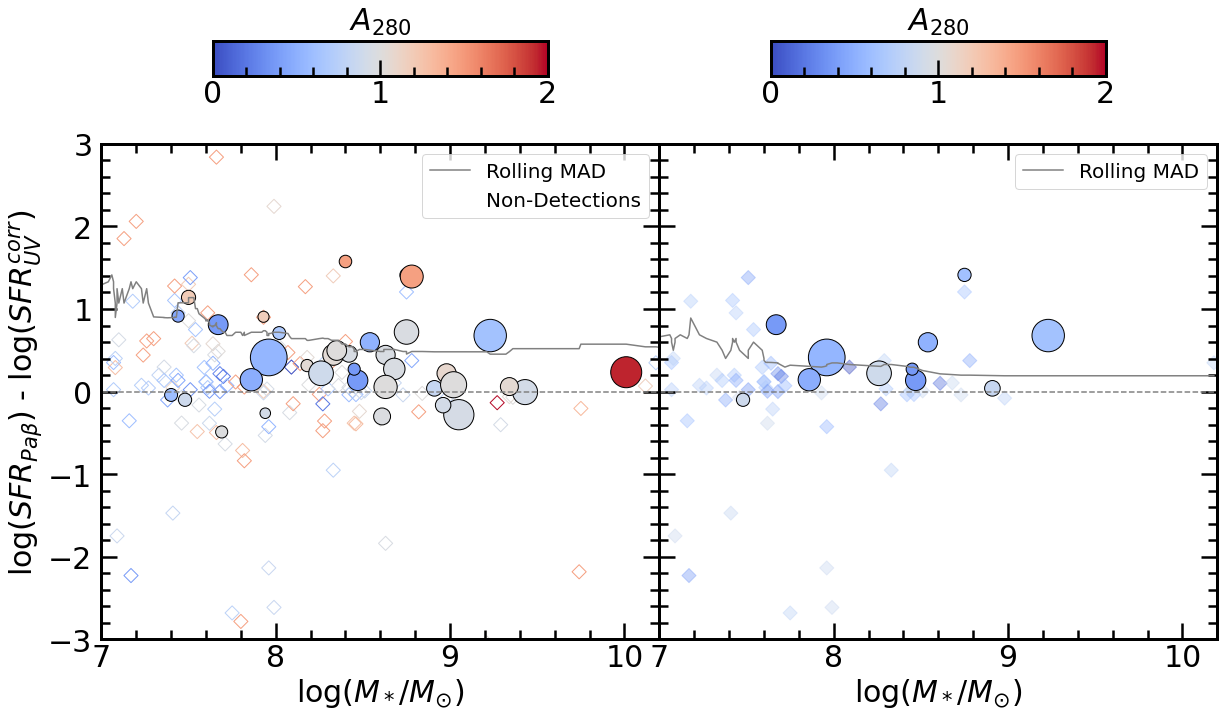

In [13]:
fig = plt.figure(figsize = (20 , 11))
gs = GridSpec(nrows=12, ncols=10)
gs.update(wspace = 0, hspace = 0.5)

ax0 = fig.add_subplot(gs[2:12, 0:5])
# ax0.fill_between(dclimitdf['td_lmass'] , -dclimitdf['ROLL_MAD'] , dclimitdf['ROLL_MAD'] , color = 'gray' , alpha = .3)
# ax0.scatter(dclimitdf['td_lmass'] , dclimitdf['sfrratio_calz'] , s = 20, c = 'black' , marker = 'v')
scatterdots0 = ax0.scatter(dclimitdf['td_lmass'] , dclimitdf['sfrratio_calz']*dclimitdf['RAND'] , s = 100, c = dclimitdf['ir_A_UV_280'], fc='none' , marker='D', cmap = 'coolwarm', vmin = 0 , vmax = 2, label='Non-Detections')
scatter0 = ax0.scatter(fullmergebaddf['td_lmass'] , fullmergebaddf['PAB_SFR_EX2'] , s = 100*fullmergebaddf['PAB_FLUX']/fullmergebaddf['PAB_FLUX_ERR'], c = fullmergebaddf['ir_A_UV_280'], ec='black' , cmap = 'coolwarm' , vmin = 0 , vmax = 2)
y0 = ax0.scatter(fullmergedf['td_lmass'] , fullmergedf['PAB_SFR_EX2'] , s = 100*fullmergedf['PAB_FLUX']/fullmergedf['PAB_FLUX_ERR'] , c = fullmergedf['ir_A_UV_280'], ec='black' , cmap = 'coolwarm' , vmin = 0 , vmax = 2)
ax0.plot(dclimitdf['td_lmass'] , dclimitdf['ROLL_MAD'] , c = 'gray' , label = 'Rolling MAD')
# ax0.plot(dclimitdf['td_lmass'] , -dclimitdf['ROLL_MAD'] , c = 'gray')
# ax0.plot(dclimitdf['td_lmass'] , dclimitdf['ROLL_MAD_FIT_TOP'] , c = 'gray' , label = 'Rolling MAD to fit')
# ax0.plot(dclimitdf['td_lmass'] , dclimitdf['ROLL_MAD_FIT_BOT'] , c = 'gray')
#ax0.errorbar(massmeds , mads6, c = 'red' , yerr = [i*0.6745 for i in mads6] , ms = 10 , marker = 's' , linestyle = 'None')
ax0.plot([6 , 11] , [0 , 0] , '--' , c = 'gray')
ax0.set_ylabel(r'log($SFR_{Pa\beta}$) - log($SFR_{UV}^{corr}$)')
ax0.set_xlabel('log$(M_*/M_{\odot})$')
ax0.axis([7 , 10.2 , -3 , 3])
ax0.legend()

ax3 = fig.add_subplot(gs[0:1,1:4])
fig.colorbar(y0,ax3,use_gridspec=True,orientation='horizontal' ,  label = r'$A_{280}$')
ax3.xaxis.set_label_position('top')
ax3.xaxis.get_label().set_verticalalignment('bottom')

ax1 = fig.add_subplot(gs[2:12, 5:10])
# ax1.fill_between(dclimitbetanegdf['td_lmass'] , -dclimitbetanegdf['ROLL_MAD'] , dclimitbetanegdf['ROLL_MAD'] , color = 'gray' , alpha = .3)
scatterdots1 = ax1.scatter(dclimitbetanegdf['td_lmass'] , dclimitbetanegdf['SFR_RAND'] , s = 100, c = dclimitbetanegdf['ir_A_UV_280'], marker='D' , cmap = 'coolwarm' , vmin = 0 , vmax = 2, alpha = .4)
# scatterdots1.set_facecolor('none')
y1 = ax1.scatter(dcsampledf['td_lmass'][dcsampledf.ir_A_UV_280 < .9] , dcsampledf['PAB_SFR_EX2'][dcsampledf.ir_A_UV_280 < .9] , s = 100*dcsampledf['PAB_FLUX'][dcsampledf.ir_A_UV_280 < .9]/dcsampledf['PAB_FLUX_ERR'][dcsampledf.ir_A_UV_280 < .9] , c = dcsampledf['ir_A_UV_280'][dcsampledf.ir_A_UV_280 < .9], ec='black' , cmap = 'coolwarm' , vmin = 0 , vmax = 2)
ax1.plot(dclimitbetanegdf['td_lmass'] , dclimitbetanegdf['ROLL_MAD'] , c = 'gray' , label = 'Rolling MAD')
# ax1.plot(dclimitbetanegdf['td_lmass'] , -dclimitbetanegdf['ROLL_MAD'] , c = 'gray')
ax1.plot([6 , 11] , [0 , 0] , '--' , c = 'gray')
ax1.set_xlabel('log$(M_*/M_{\odot})$')
ax1.axis([7 , 10.2 , -3 , 3])
ax1.legend()
ax1.tick_params(labelleft = False)

ax4 = fig.add_subplot(gs[0:1,6:9])
fig.colorbar(y1,ax4,use_gridspec=True,orientation='horizontal' ,  label = r'$A_{280}$')
ax4.xaxis.set_label_position('top')
ax4.xaxis.get_label().set_verticalalignment('bottom')

plt.show()


In [60]:
# fullmergedfbs = fullmergedf[(fullmergedf['td_lmass'] < 9)&(fullmergedf['td_lmass'] > 6.5)]
# sortedclearmergedfbs = sortedclearmergedf[(sortedclearmergedf['td_lmass'] < 9)&(sortedclearmergedf['td_lmass'] > 6.5)]
fullmergedfbs = fullmergedf.copy()
sortedclearmergedf = sortedclearmergedf.drop_duplicates(subset=['ID'], keep='first')
sortedclearmergedfbs = sortedclearmergedf.copy()
dclimitdfbs = dclimitdf.copy()
dcsampledfbs = dcsampledf.copy()

In [61]:
mad0 = []
mad1 = []
mad2 = []
mad3 = []
mad4 = []
mad5 = []

for i in range(0 , 200):
    sortedclearmergedfbs['RAND_RS'] = abs(np.random.normal(0 , 1 , len(sortedclearmergedfbs)))
    sortedclearmergedfbs["PAB_FLUX_LIMIT_RS"] = sortedclearmergedfbs["PAB_FLUX_ERR"]*sortedclearmergedfbs["RAND_RS"]
    sortedclearmergedfbs['PAB_L_LIMIT_RS'] = sortedclearmergedfbs['PAB_FLUX_LIMIT_RS'] * 4 * np.pi * sortedclearmergedfbs['DL']**2 * 9.521 * 10**(48) * 10**(-17)
    sortedclearmergedfbs['PAB_SFR_LIMIT_RS'] = np.log10(sortedclearmergedfbs['PAB_L_LIMIT_RS'].astype(float)) - 40.02
    sortedclearmergedfbs['RS'] = sortedclearmergedfbs['PAB_SFR_LIMIT_RS'] - np.log10(sortedclearmergedfbs['ir_SFR-UV_corr'])
    bren = []
    for j in range(len(fullmergedfbs)):
        rand = np.random.normal(0 , fullmergedfbs["PAB_SFR_EX2_ERR"][j])
        bren = np.append(bren , rand) 
    fullmergedfbs['RS'] = fullmergedfbs['PAB_SFR_EX2'] + bren
    bsdf = pd.concat([fullmergedfbs , sortedclearmergedfbs])
    bsdf = bsdf[(bsdf['td_lmass'] > 7)&(bsdf['td_lmass'] < 9)]
    bsdf['bins'] = pd.qcut(bsdf['td_lmass'] , 6 , labels = False)
    mad0 = np.append(mad0 , np.median(bsdf['RS'][bsdf.bins == 0]))
    mad1 = np.append(mad1 , np.median(bsdf['RS'][bsdf.bins == 1]))
    mad2 = np.append(mad2 , np.median(bsdf['RS'][bsdf.bins == 2]))
    mad3 = np.append(mad3 , np.median(bsdf['RS'][bsdf.bins == 3]))
    mad4 = np.append(mad4 , np.median(bsdf['RS'][bsdf.bins == 4]))
    mad5 = np.append(mad5 , np.median(bsdf['RS'][bsdf.bins == 5]))

In [51]:
mad0 = []
mad1 = []
mad2 = []
mad3 = []
mad4 = []
mad5 = []

for i in range(0 , 200):
    dclimitdfbs['RAND_RS'] = abs(np.random.normal(0 , 1 , len(dclimitdfbs)))
    dclimitdfbs["RS"] = dclimitdfbs['sfrratio_calz']*dclimitdfbs["RAND_RS"]
    bren = []
    for j in range(len(fullmergedfbs)):
        rand = np.random.normal(0 , fullmergedfbs["PAB_SFR_EX2_ERR"][j])
        bren = np.append(bren , rand) 
    fullmergedfbs['RS'] = fullmergedfbs['PAB_SFR_EX2'] + bren
    bsdf = pd.concat([fullmergedfbs , dclimitdfbs])
    bsdf = bsdf[(bsdf['td_lmass'] > 7)&(bsdf['td_lmass'] < 9)]
    bsdf['bins'] = pd.qcut(bsdf['td_lmass'] , 6 , labels = False)
    mad0 = np.append(mad0 , abs(np.median(bsdf['RS'][bsdf.bins == 0])))
    mad1 = np.append(mad1 , abs(np.median(bsdf['RS'][bsdf.bins == 1])))
    mad2 = np.append(mad2 , abs(np.median(bsdf['RS'][bsdf.bins == 2])))
    mad3 = np.append(mad3 , abs(np.median(bsdf['RS'][bsdf.bins == 3])))
    mad4 = np.append(mad4 , abs(np.median(bsdf['RS'][bsdf.bins == 4])))
    mad5 = np.append(mad5 , abs(np.median(bsdf['RS'][bsdf.bins == 5])))

In [62]:
dclimitbetanegdfbs = dclimitbetanegdf.copy()
dcsamplebetanegdfbs = dcsampledf[dcsampledf.ir_A_UV_280 < .9].copy()
dcsamplebetanegdfbs.reset_index(drop = True,inplace=True)

In [63]:
mad0n = []
mad1n = []
mad2n = []
mad3n = []
mad4n = []
mad5n = []

for i in range(0 , 200):
    dclimitbetanegdfbs['RAND_RS'] = abs(np.random.normal(0 , 1 , len(dclimitbetanegdfbs)))
    dclimitbetanegdfbs["RS"] = dclimitbetanegdfbs['sfrratio_calz']*dclimitbetanegdfbs["RAND_RS"]
    bren = []
    for j in range(len(dcsamplebetanegdfbs)):
        rand = np.random.normal(0 , dcsamplebetanegdfbs["PAB_SFR_EX2_ERR"][j])
        bren = np.append(bren , rand) 
    dcsamplebetanegdfbs['RS'] = dcsamplebetanegdfbs['PAB_SFR_EX2'] + bren
    bsdfn = pd.concat([dcsamplebetanegdfbs , dclimitbetanegdfbs])
    bsdfn = bsdfn[(bsdfn['td_lmass'] > 7)&(bsdfn['td_lmass'] < 9)]
    bsdfn['bins'] = pd.qcut(bsdfn['td_lmass'] , 6 , labels = False)
    
    mad0n = np.append(mad0n , abs(np.median(bsdfn['RS'][bsdfn.bins == 0])))
    mad1n = np.append(mad1n , abs(np.median(bsdfn['RS'][bsdfn.bins == 1])))
    mad2n = np.append(mad2n , abs(np.median(bsdfn['RS'][bsdfn.bins == 2])))
    mad3n = np.append(mad3n , abs(np.median(bsdfn['RS'][bsdfn.bins == 3])))
    mad4n = np.append(mad4n , abs(np.median(bsdfn['RS'][bsdfn.bins == 4])))
    mad5n = np.append(mad5n , abs(np.median(bsdfn['RS'][bsdfn.bins == 5])))

In [64]:
massmeds = []
massmedsn = []
for i in range(0 , 6):
    tdmed = np.median(bsdf['td_lmass'][bsdf['bins'] == i])
    massmeds= np.append(massmeds , tdmed)
for i in range(0 , 6):
    tdmedn = np.median(bsdfn['td_lmass'][bsdfn['bins'] == i])
    massmedsn= np.append(massmedsn , tdmedn)
    
d = {'bin0':mad0 , 'bin1':mad1 , 'bin2':mad2 , 'bin3':mad3 , 'bin4':mad4 , 'bin5':mad5}
slopedf = pd.DataFrame(data = d)
dn = {'bin0':mad0n , 'bin1':mad1n , 'bin2':mad2n , 'bin3':mad3n , 'bin4':mad4n , 'bin5':mad5n }
slopedfn = pd.DataFrame(data = dn)

m = []
mn = []
for i in range(len(slopedf)):
    coef = np.polyfit(massmeds , slopedf.iloc[i], 1)
    poly1d_fn = np.poly1d(coef) 
    m= np.append(m , coef[0])
    coefn = np.polyfit(massmedsn , slopedfn.iloc[i], 1)
    poly1d_fnn = np.poly1d(coefn) 
    mn= np.append(mn , coefn[0])
slopedf['fit_slope'] = m
slopedfn['fit_slope'] = mn


In [76]:
print('slope for all A280: ' + str(round(slopedf.fit_slope.median(), 5)) + r' +/- ' + str(round(slopedf.fit_slope.std(),5)))
print('slope for A280 < .9: ' + str(round(slopedfn.fit_slope.median(),5)) + r' +/- ' + str(round(slopedfn.fit_slope.std(),5)))


slope for all A280: -0.20014 +/- 0.08467
slope for A280 < .9: -0.01607 +/- 0.03147
